# Assignment is at the bottom! 

In [1]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from pylab import rcParams
rcParams['figure.figsize'] = 20, 10


from sklearn.linear_model import LogisticRegression as Model

In [2]:
# creating dummy dataset with 10 datapoints of 0s and 1s to set up classification problem
# will treat 0s and 1s as probabilities

y = np.concatenate([np.zeros(10), np.ones(10)])
x = np.linspace(0, 10, len(y))

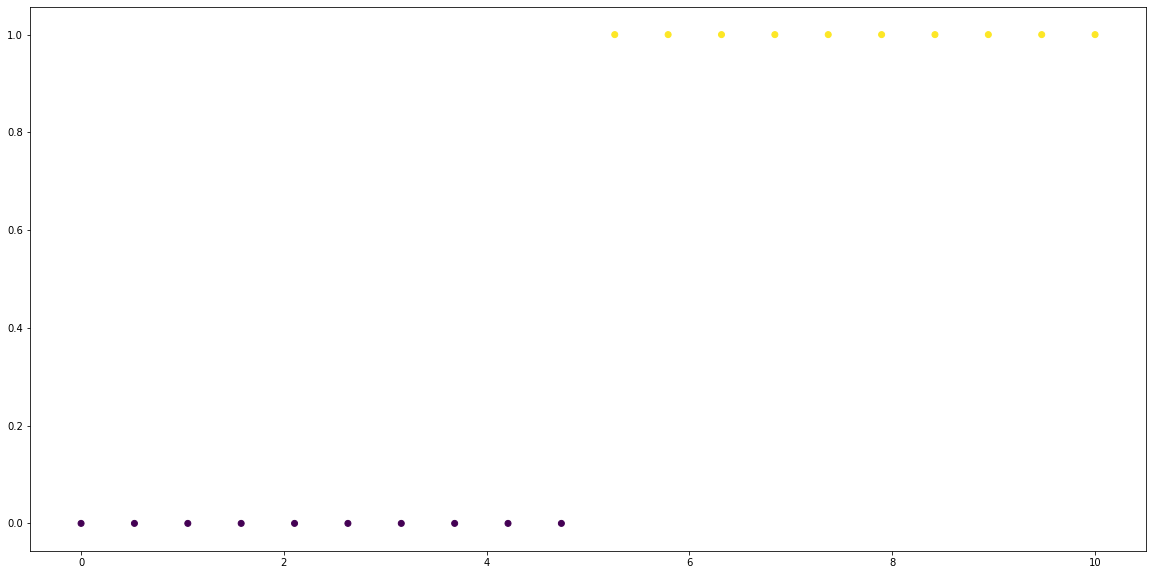

In [3]:
plt.scatter(x, y, c=y)

In [5]:
model = LogisticRegression()

In [6]:
model.fit(x.reshape(-1, 1),y)

LogisticRegression()

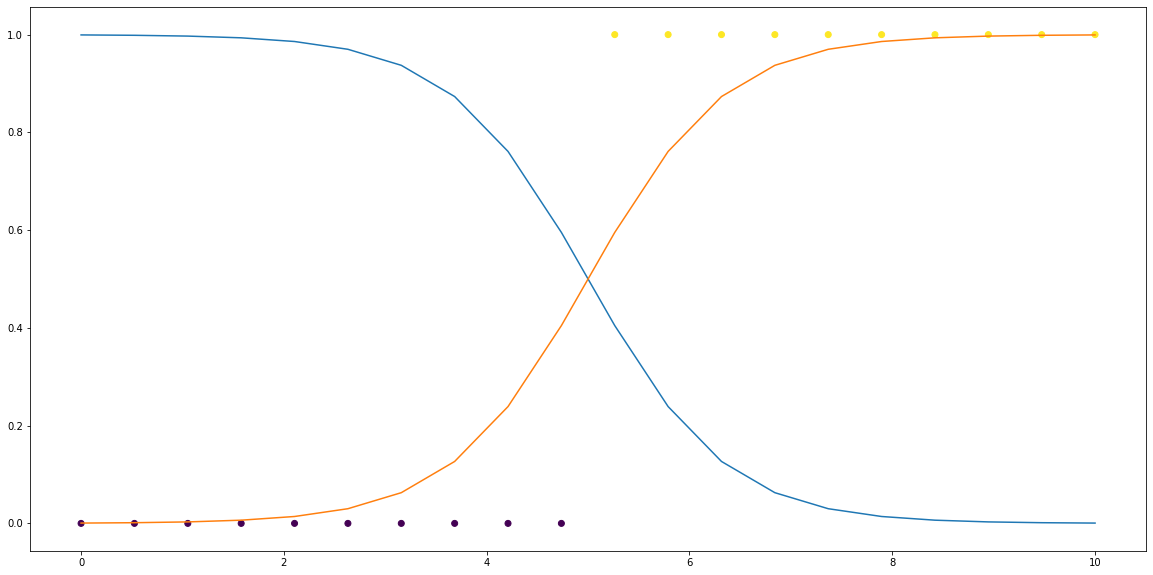

In [8]:
plt.scatter(x,y, c=y)
plt.plot(x, model.predict_proba(x.reshape(-1, 1)))

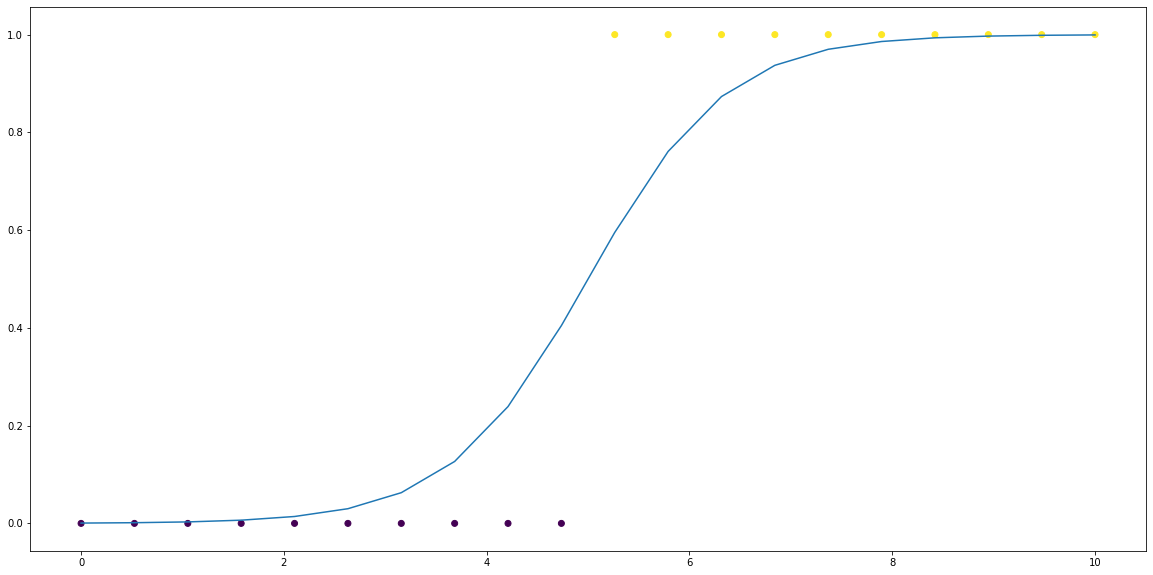

In [10]:
# only concerned with probablity of orange line (above)
plt.scatter(x,y, c=y)
plt.plot(x, model.predict_proba(x.reshape(-1, 1))[:,1])

In [11]:
b, b0 = model.coef_, model.intercept_
model.coef_, model.intercept_

(array([[1.46709085]]), array([-7.33542562]))

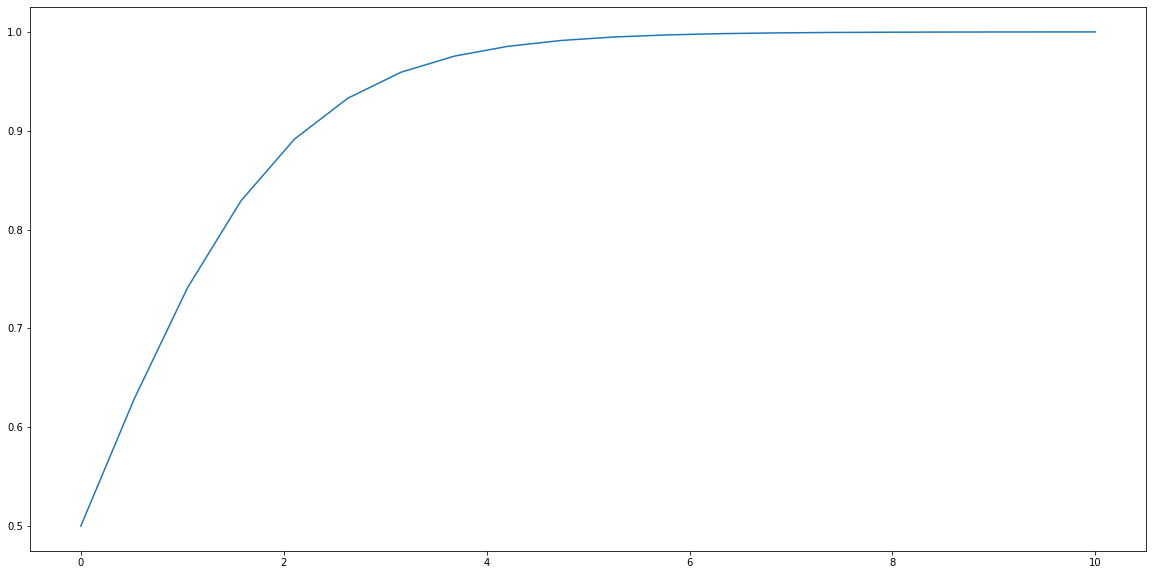

In [12]:
# shows only half of the signoid
plt.plot(x, 1/(1+np.exp(-x)))

In [13]:
b

array([[1.46709085]])

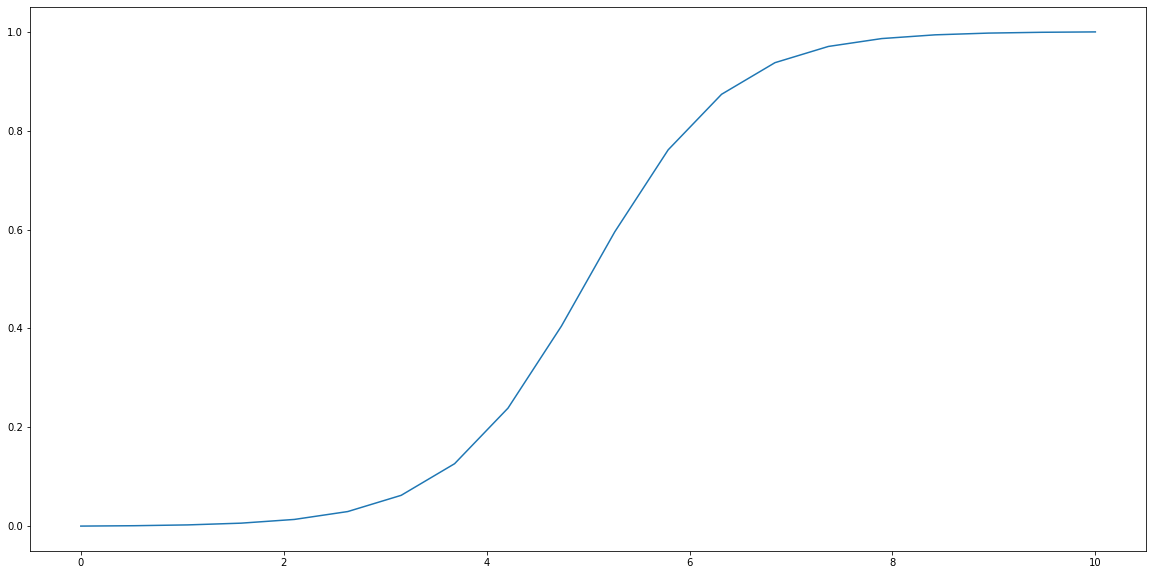

In [14]:
plt.plot(x, 1/(1+np.exp(-(b[0]*x +b0))))

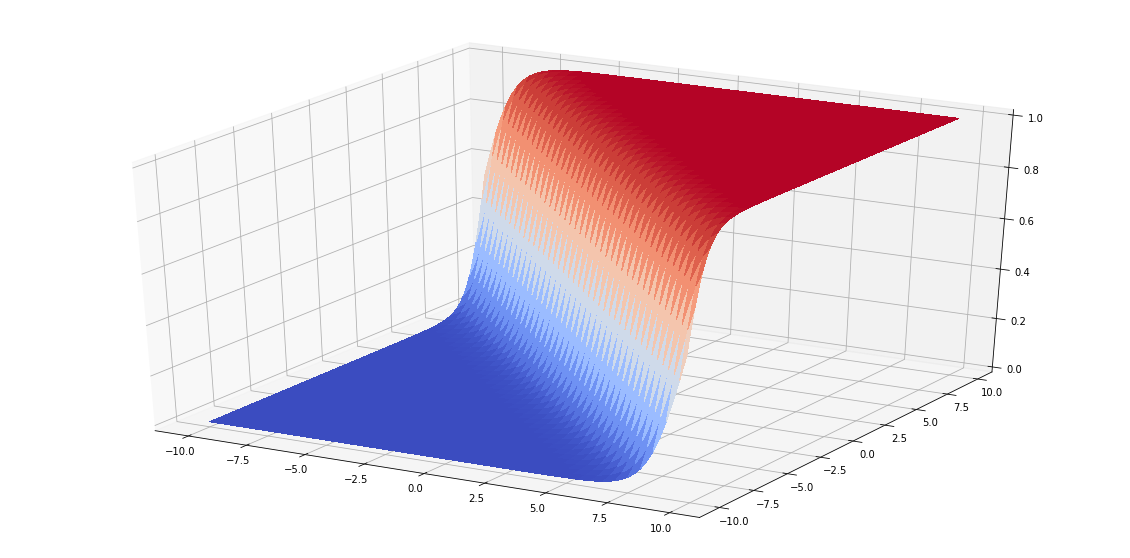

In [19]:
# 8:50 of lecture

from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-10, 10, 0.25)
Y = np.arange(-10, 10, 0.25)
X, Y = np.meshgrid(X, Y) # these are matrixes
R = np.sqrt(X**2 + Y**2)
# Z = 1/(1+np.exp(-(b[0]*X +b[0]*Y +b0))) # less steep
# Z = 1/(1+np.exp(-(b[0]*X +.25*b[0]*Y +b0))) # more steep
Z = 1/(1+np.exp(-(b[0]*X +b[0]*Y +.2*b0+2))) #moves the intercept
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


In [20]:
X

array([[-10.  ,  -9.75,  -9.5 , ...,   9.25,   9.5 ,   9.75],
       [-10.  ,  -9.75,  -9.5 , ...,   9.25,   9.5 ,   9.75],
       [-10.  ,  -9.75,  -9.5 , ...,   9.25,   9.5 ,   9.75],
       ...,
       [-10.  ,  -9.75,  -9.5 , ...,   9.25,   9.5 ,   9.75],
       [-10.  ,  -9.75,  -9.5 , ...,   9.25,   9.5 ,   9.75],
       [-10.  ,  -9.75,  -9.5 , ...,   9.25,   9.5 ,   9.75]])

In [21]:
Y

array([[-10.  , -10.  , -10.  , ..., -10.  , -10.  , -10.  ],
       [ -9.75,  -9.75,  -9.75, ...,  -9.75,  -9.75,  -9.75],
       [ -9.5 ,  -9.5 ,  -9.5 , ...,  -9.5 ,  -9.5 ,  -9.5 ],
       ...,
       [  9.25,   9.25,   9.25, ...,   9.25,   9.25,   9.25],
       [  9.5 ,   9.5 ,   9.5 , ...,   9.5 ,   9.5 ,   9.5 ],
       [  9.75,   9.75,   9.75, ...,   9.75,   9.75,   9.75]])

What if the data doesn't really fit this pattern?

In [22]:
y = np.concatenate([np.zeros(10), np.ones(10), np.zeros(10)])
x = np.linspace(0, 10, len(y))

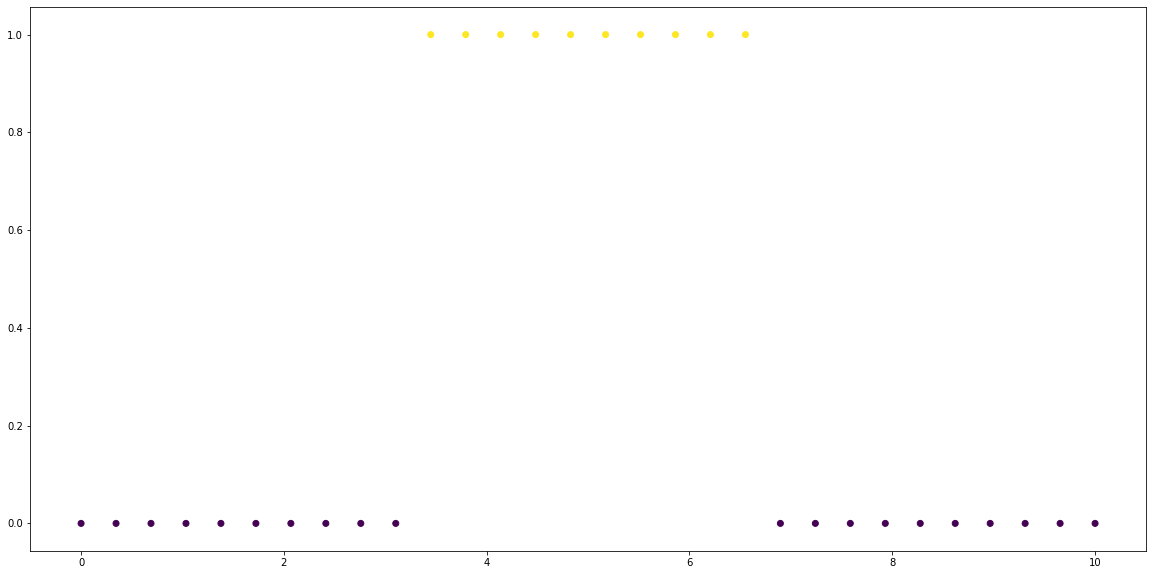

In [23]:
plt.scatter(x,y, c=y)

In [24]:
model.fit(x.reshape(-1, 1),y)

LogisticRegression()

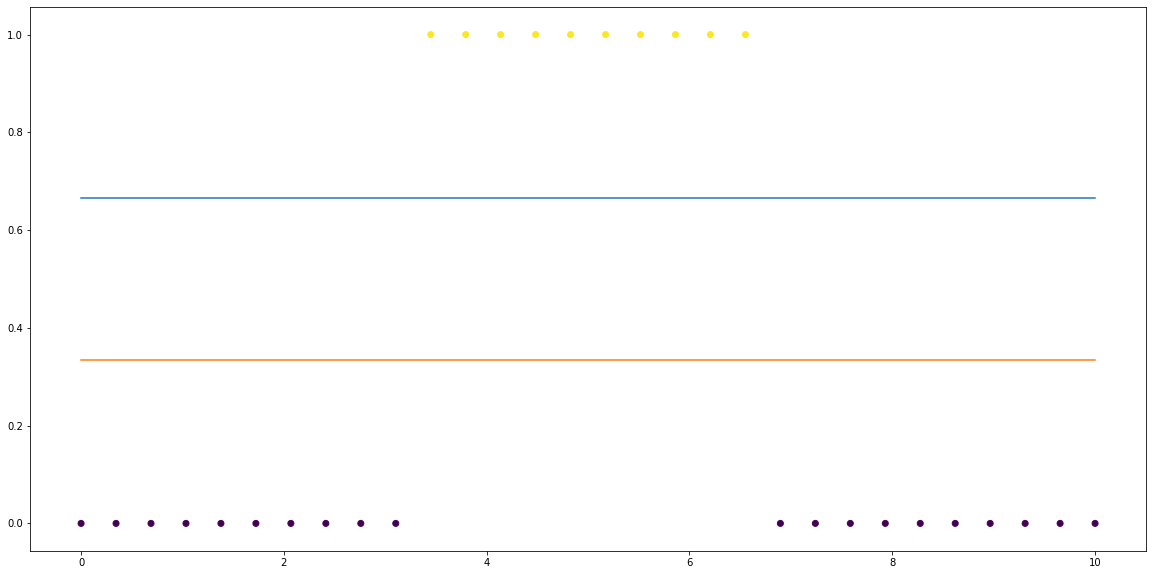

In [27]:
plt.scatter(x,y, c=y)
plt.plot(x, model.predict_proba(x.reshape(-1, 1)))

In [28]:
model1 = LogisticRegression()
model1.fit(x[:15].reshape(-1, 1),y[:15])

LogisticRegression()

In [29]:
model2 = LogisticRegression()
model2.fit(x[15:].reshape(-1, 1),y[15:])

LogisticRegression()

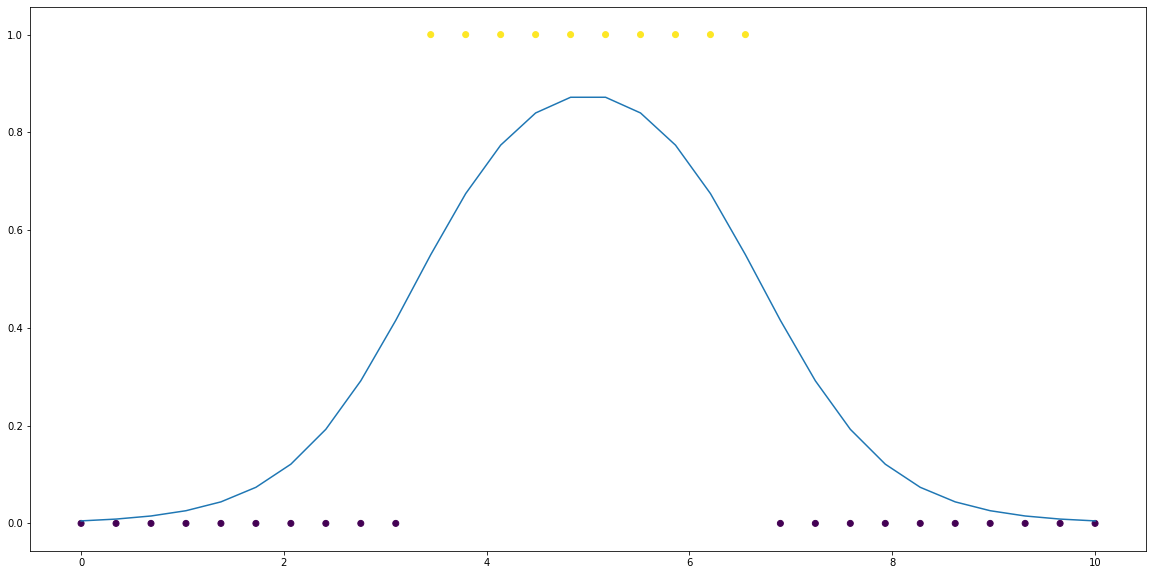

In [30]:
plt.scatter(x,y, c=y)
plt.plot(x, model1.predict_proba(x.reshape(-1, 1))[:,1] * model2.predict_proba(x.reshape(-1, 1))[:,1])

In [31]:
df = pd.read_csv('../data/adult.data', index_col=False)
golden = pd.read_csv('../data/adult.test', index_col=False)

In [35]:
from sklearn import preprocessing

enc = preprocessing.OrdinalEncoder()

In [36]:
transform_columns = ['sex', 'workclass', 'education', 'marital-status', 
                     'occupation', 'relationship', 'race', 'sex', 
                     'native-country', 'salary']

In [37]:
x = df.copy()

x[transform_columns] = enc.fit_transform(df[transform_columns])

golden['salary'] = golden.salary.replace(' <=50K.', ' <=50K').replace(' >50K.', ' >50K')
xt = golden.copy()

xt[transform_columns] = enc.transform(golden[transform_columns])

In [38]:
df.salary.unique()

array([' <=50K', ' >50K'], dtype=object)

In [39]:
golden.salary.replace(' <=50K.', ' <=50K').replace(' >50K.', ' >50K').unique()

array([' <=50K', ' >50K'], dtype=object)

In [40]:
model.fit(preprocessing.scale(x.drop('salary', axis=1)), x.salary)

LogisticRegression()

In [41]:
pred = model.predict(preprocessing.scale(x.drop('salary', axis=1)))
pred_test = model.predict(preprocessing.scale(xt.drop('salary', axis=1)))

In [42]:
x.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,7.0,77516,9.0,13,4.0,1.0,1.0,4.0,1.0,2174,0,40,39.0,0.0
1,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,0.0
2,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,0.0
3,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,0.0
4,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0.0,0,0,40,5.0,0.0


In [43]:
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    confusion_matrix, auc, roc_curve
)

In [44]:
accuracy_score(x.salary, pred)

0.8250360861152913

In [45]:
confusion_matrix(x.salary, pred)

array([[23300,  1420],
       [ 4277,  3564]], dtype=int64)

In [46]:
print(classification_report(x.salary, pred))

              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89     24720
         1.0       0.72      0.45      0.56      7841

    accuracy                           0.83     32561
   macro avg       0.78      0.70      0.72     32561
weighted avg       0.81      0.83      0.81     32561



In [47]:
print(classification_report(xt.salary, pred_test))

              precision    recall  f1-score   support

         0.0       0.85      0.94      0.89     12435
         1.0       0.70      0.45      0.55      3846

    accuracy                           0.82     16281
   macro avg       0.77      0.69      0.72     16281
weighted avg       0.81      0.82      0.81     16281



# Assignment 

## 1. Use your own dataset (create a train and a test set) and build 2 models: Logistic Regression and Decision Tree (shallow (2-3)). Compare the test results.
## 2. Repeat 1. but let the Decision Tree be much deeper to allow over-fitting. Compare the two models' test results again, does the Logistic Regression have an improvement due to a lower variance?

In [48]:
insurance = pd.read_csv('../data/insurance.csv') 
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [67]:
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [51]:
from sklearn import preprocessing
enc = preprocessing.OrdinalEncoder()

In [52]:
transform_columns = ['sex', 'smoker', 'region']

In [55]:
x = insurance.copy()
x[transform_columns] = enc.fit_transform(insurance[transform_columns])
x

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,10600.54830
1334,18,0.0,31.920,0,0.0,0.0,2205.98080
1335,18,0.0,36.850,0,0.0,2.0,1629.83350
1336,21,0.0,25.800,0,0.0,3.0,2007.94500


In [79]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x.drop('smoker', axis=1), x.smoker, test_size=.25)

In [80]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [81]:
model.fit(preprocessing.scale(x_train), y_train)
model.coef_, model.intercept_

(array([[-1.06453422,  0.17610947, -1.87579667, -0.15880939, -0.06971932,
          4.16261704]]),
 array([-3.63878085]))

In [82]:
pred = model.predict(preprocessing.scale(x_train))
pred_test = model.predict(preprocessing.scale(x_test))

In [78]:
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    confusion_matrix, auc, roc_curve
)

In [95]:
accuracy_score(y_test, pred_test)

0.9641791044776119

In [91]:
confusion_matrix(y_test, pred_test)

array([[263,  12],
       [  0,  60]], dtype=int64)

In [93]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98       275
         1.0       0.83      1.00      0.91        60

    accuracy                           0.96       335
   macro avg       0.92      0.98      0.94       335
weighted avg       0.97      0.96      0.97       335

